In [88]:
# set up random forest regressor and train/test split w/ dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import math
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("dataset_tall_schools.csv")
labels = np.array(df["Sparta score"])
features = df.drop(["Sparta score", "Last name", "First name", "School District", "Weight (lb)", "Scan Type", "T-score standard deviation", "Jump height (in)"], axis = 1)

feature_list = list(features.columns)
features = np.array(features)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)


In [89]:
# run random forest regressor w/ 1000 decision trees and fit it to train data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [90]:
# predict using the test data and determine average error
predictions = rf.predict(X_test)
errors = abs(predictions - y_test)
print("Mean Absolute Error:", np.mean(errors))

Mean Absolute Error: 1.0009777777777784


In [91]:
# finding accuracy of rf on test set
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print("Accuracy:", accuracy)

Accuracy: 98.59317361436898


In [92]:
# finding accuracy of algorithm on training set to compare fit
predictions_train = rf.predict(X_train)
errors_train = abs(predictions_train - y_train)
print("Mean Absolute Error:", np.mean(errors_train))

mape = 100 * (errors_train / y_train)
accuracy_train = 100 - np.mean(mape)
print("Accuracy:", accuracy_train)

Mean Absolute Error: 0.38039887640449366
Accuracy: 99.43744943224442


[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\nsquared_error = 0.667\nsamples = 150\nvalue = 1.0'),
 Text(0.4230769230769231, 0.75, 'squared_error = 0.0\nsamples = 50\nvalue = 0.0'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\nsquared_error = 0.25\nsamples = 100\nvalue = 1.5'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\nsquared_error = 0.084\nsamples = 54\nvalue = 1.093'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\nsquared_error = 0.02\nsamples = 48\nvalue = 1.021'),
 Text(0.07692307692307693, 0.25, 'squared_error = 0.0\nsamples = 47\nvalue = 1.0'),
 Text(0.23076923076923078, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 2.0'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\nsquared_error = 0.222\nsamples = 6\nvalue = 1.667'),
 Text(0.38461538461538464, 0.25, 'squared_error = 0.0\nsamples = 3\nvalue = 2.0'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\nsquared_error = 0.222\nsamples = 3\nvalue = 1.333'),
 Text(0.46153846153846156

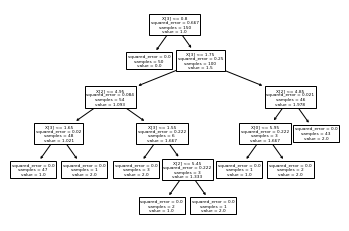

In [115]:
# decision tree visualization

from sklearn import tree

rftree = rf.estimators_[5]

from sklearn.tree import export_graphviz

export_graphviz(rftree, out_file = "tree.dot", rounded = True, proportion = False, precision = 2, filled = True)

#from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

#from IPython.display import Image
#Image(filename = 'tree.png')

tree.plot_tree(rftree)

In [87]:
# repeating algorithm but with the standard dev of t-score as a representation of injury risk

labels2 = np.array(df["T-score standard deviation"])
features2 = df.drop(["Sparta score", "Last name", "First name", "School District", "Weight (lb)", "Scan Type", "T-score standard deviation", "Jump height (in)"], axis = 1)

feature_list2 = list(features2.columns)
features2 = np.array(features2)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)
errors = abs(predictions - y_test)
print("Mean Absolute Error:", np.mean(errors))

predictions_train = rf.predict(X_train)
errors_train = abs(predictions_train - y_train)
print("Mean Absolute Error:", np.mean(errors_train))

mape = 100 * (errors_train / y_train)
accuracy_train = 100 - np.mean(mape)
print("Accuracy:", accuracy_train)

Mean Absolute Error: 1.0009777777777784
Mean Absolute Error: 0.38039887640449366
Accuracy: 99.43744943224442


In [ ]:
from 

dot -Tps filename.dot -o outfile.ps